In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, Birch, AgglomerativeClustering, KMeans
from sklearn.metrics import rand_score, calinski_harabasz_score, silhouette_score, davies_bouldin_score
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("penguins.csv")
df_clean = df.dropna()
df_clean

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


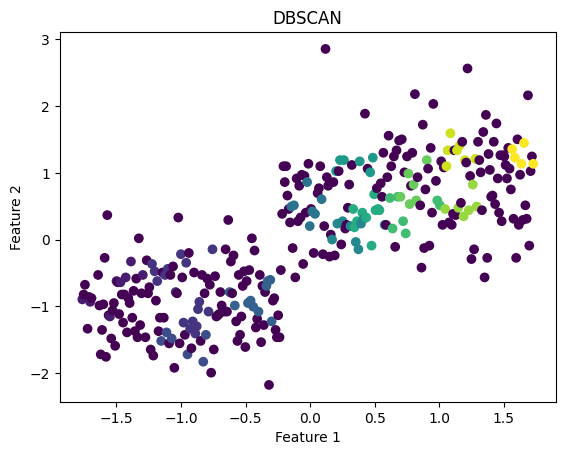

In [2]:
#DBSCAN
numeric_data = df_clean.drop(['species', 'island', 'sex'], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_clean = df_clean.copy()
df_clean['cluster'] = dbscan.fit_predict(scaled_data)

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df_clean['cluster'], cmap='viridis')
plt.title('DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

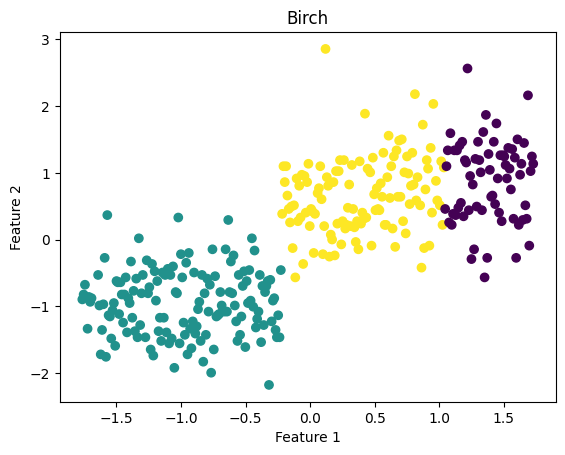

In [3]:
# Birch
numeric_data = df_clean.drop(['species', 'island', 'sex'], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
birch = Birch(threshold=0.5, branching_factor=50, n_clusters=3)
df_clean = df_clean.copy()
df_clean['cluster'] = birch.fit_predict(scaled_data)

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df_clean['cluster'], cmap='viridis')
plt.title('Birch')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

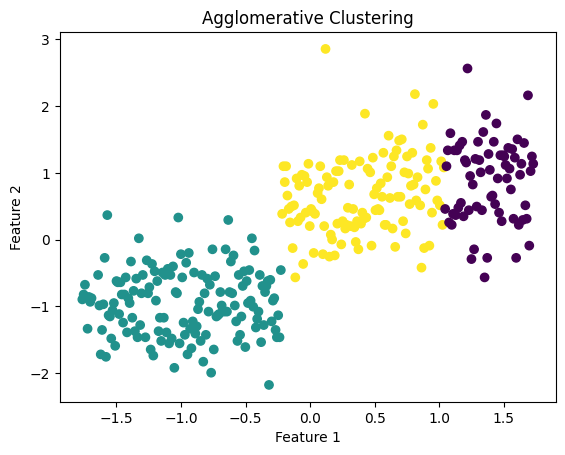

In [4]:
#Agglomerative Clustering
n_clusters = 3
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
df_clean = df_clean.copy()
df_clean['cluster'] = agg_cluster.fit_predict(scaled_data)

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df_clean['cluster'], cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

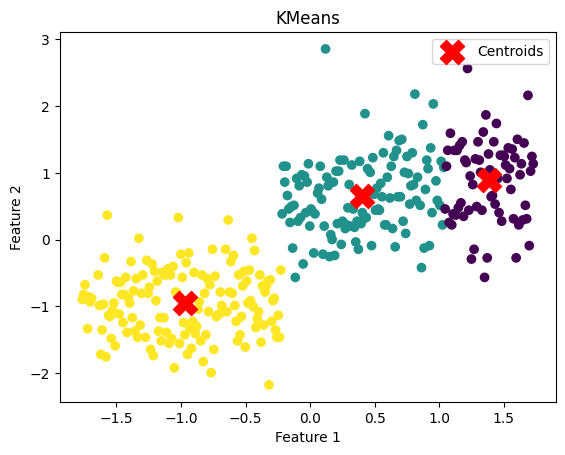

In [5]:
# KMeans
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_clean = df_clean.copy()
df_clean['cluster'] = kmeans.fit_predict(scaled_data)

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df_clean['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('KMeans')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [6]:
true_labels = df_clean['species']

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
dbscan_rand = rand_score(true_labels, dbscan_labels)
dbscan_silhouette = silhouette_score(scaled_data, dbscan_labels)
dbscan_davies_bouldin = davies_bouldin_score(scaled_data, dbscan_labels)
dbscan_calinski_harabasz = calinski_harabasz_score(scaled_data, dbscan_labels)

birch = Birch(threshold=0.5, branching_factor=50, n_clusters=3)
birch_labels = birch.fit_predict(scaled_data)
birch_rand = rand_score(true_labels, birch_labels)
birch_silhouette = silhouette_score(scaled_data, birch_labels)
birch_davies_bouldin = davies_bouldin_score(scaled_data, birch_labels)
birch_calinski_harabasz = calinski_harabasz_score(scaled_data, birch_labels)

agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_cluster.fit_predict(scaled_data)
agg_rand = rand_score(true_labels, agg_labels)
agg_silhouette = silhouette_score(scaled_data, agg_labels)
agg_davies_bouldin = davies_bouldin_score(scaled_data, agg_labels)
agg_calinski_harabasz = calinski_harabasz_score(scaled_data, agg_labels)

kmeans = KMeans(n_clusters=3, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)
kmeans_rand = rand_score(true_labels, kmeans_labels)
kmeans_calinski_harabasz = calinski_harabasz_score(scaled_data, kmeans_labels)
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(scaled_data, kmeans_labels)

print("DBSCAN Results:")
print("Rand Index             :", dbscan_rand)
print("Silhouette Score       :", dbscan_silhouette)
print("Davies Bouldin Index   :", dbscan_davies_bouldin)
print("Calinski-Harabasz Score:", dbscan_calinski_harabasz)
print("\n")

print("Birch Results:")
print("Rand Index             :", birch_rand)
print("Silhouette Score       :", birch_silhouette)
print("Davies Bouldin Index   :", birch_davies_bouldin)
print("Calinski-Harabasz Score:", birch_calinski_harabasz)
print("\n")

print("Agglomerative Clustering Results:")
print("Rand Index             :", agg_rand)
print("Silhouette Score       :", agg_silhouette)
print("Davies Bouldin Index   :", agg_davies_bouldin)
print("Calinski-Harabasz Score:", agg_calinski_harabasz)
print("\n")

print("KMeans Results:")
print("Rand Index             :", kmeans_rand)
print("Silhouette Score       :", kmeans_silhouette)
print("Davies Bouldin Index   :", kmeans_davies_bouldin)
print("Calinski-Harabasz Score:", kmeans_calinski_harabasz)
print("\n")

DBSCAN Results:
Rand Index             : 0.5136401461702667
Silhouette Score       : -0.09538967940231312
Davies Bouldin Index   : 1.0355903123260757
Calinski-Harabasz Score: 14.223910170800425


Birch Results:
Rand Index             : 1.0
Silhouette Score       : 0.4012439054048202
Davies Bouldin Index   : 1.2207458926130221
Calinski-Harabasz Score: 195.50564142711013
Agglomerative Clustering Results:
Rand Index             : 1.0
Silhouette Score       : 0.4012439054048202
Davies Bouldin Index   : 1.2207458926130221
Calinski-Harabasz Score: 195.50564142711013


KMeans Results:
Rand Index             : 1.0
Silhouette Score       : 0.4012439054048202
Davies Bouldin Index   : 1.2207458926130221
Calinski-Harabasz Score: 195.50564142711013


